In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.misc import imresize

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

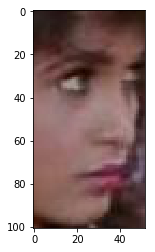

In [3]:
i = random.choice(train.index)

img_name = train.ID[i]
img = plt.imread("./Train/"+img_name)
plt.imshow(img)

In [4]:
train_list=list(train['ID'])

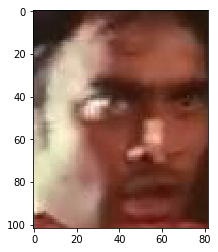

In [28]:
plt.imshow(plt.imread("./Train/"+train_list[1]))

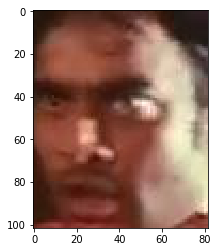

In [27]:
plt.imshow(np.fliplr(plt.imread("./Train/"+train_list[1])))

In [5]:
newtrain_list=[]
for i in train_list:
    if plt.imread("./Train/"+i).shape[0]>32 and plt.imread("./Train/"+i).shape[1]>32:
        newtrain_list.append(i)
len(newtrain_list)

17182

In [6]:
test_list=list(test['ID'])

In [7]:
from scipy.misc import imresize

temp = []
for img_name in newtrain_list:
    img = plt.imread("./Train/"+img_name)
    img = imresize(img, (48,48))
    img = img.astype('float32')
    temp.append(img)
    img = imresize(np.fliplr(img), (48,48))

train_x = np.stack(temp)

/home/ravitejalam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [8]:
temp = []
for img_name in test.ID:
    img = plt.imread("./Test/"+img_name)
    img = imresize(img, (48,48))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

/home/ravitejalam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [9]:
train_x = train_x / 255.
test_x = test_x / 255.

In [10]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [11]:
new_target=[]
for i in newtrain_list:
    new_target.append(str(train[train['ID']==i]['Class']).split()[1])
len(new_target)

17182

In [12]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(new_target)
train_y = keras.utils.np_utils.to_categorical(train_y)
train_y

/home/ravitejalam/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer,Conv2D,MaxPooling2D

In [14]:
model = Sequential([
    InputLayer(input_shape=(48,48, 3)),
    Conv2D(50, (5,5), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(100, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(150, (2,2), activation = 'relu'),
    Flatten(),
    Dense(units=3, activation='softmax'),
])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 50)        3800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 100)       45100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 150)         60150     
_________________________________________________________________
flatten_1 (Flatten)          (None, 12150)             0         
__________

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=120,epochs=10,verbose=1)

Epoch 1/10
17182/17182 [==============================] - 103s 6ms/step - loss: 0.8631 - acc: 0.6013
Epoch 2/10
17182/17182 [==============================] - 120s 7ms/step - loss: 0.7546 - acc: 0.6730
Epoch 3/10
17182/17182 [==============================] - 119s 7ms/step - loss: 0.6984 - acc: 0.6993
Epoch 4/10
17182/17182 [==============================] - 117s 7ms/step - loss: 0.6590 - acc: 0.7194
Epoch 5/10
17182/17182 [==============================] - 111s 6ms/step - loss: 0.6181 - acc: 0.7423
Epoch 6/10
17182/17182 [==============================] - 116s 7ms/step - loss: 0.5827 - acc: 0.7575
Epoch 7/10
17182/17182 [==============================] - 113s 7ms/step - loss: 0.5501 - acc: 0.7747
Epoch 8/10
17182/17182 [==============================] - 116s 7ms/step - loss: 0.5120 - acc: 0.7875
Epoch 9/10
17182/17182 [==============================] - 113s 7ms/step - loss: 0.4717 - acc: 0.8108
Epoch 10/10
17182/17182 [==============================] - 108s 6ms/step - loss: 0.4399 - a

In [17]:
pred = model.predict_classes(test_x)

pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv("BasicResult.csv", index=False)

/home/ravitejalam/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
pred

array(['MIDDLE', 'YOUNG', 'YOUNG', ..., 'MIDDLE', 'MIDDLE', 'OLD'],
      dtype='<U6')

In [19]:
train.shape[0]

19906